In [1]:
#import the libraries
import pandas as pd
from tqdm import tqdm_notebook
from pprint import pprint
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
#read in the csv file
data = pd.read_csv('Consumer_Complaints.csv', nrows = 100000)

In [3]:
#checking the first 5 roews of the data
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,3/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,3/17/2014,Closed with explanation,Yes,No,759217
1,10/1/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/5/2016,Closed with explanation,Yes,No,2141773
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100
3,6/8/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,6/10/2014,Closed with explanation,Yes,Yes,885638
4,9/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,9/13/2014,Closed with explanation,Yes,Yes,1027760


In [4]:
#considering the 'consumer complaints' column
data = data[['Consumer complaint narrative']]

In [5]:
data.head()

,Consumer complaint narrative
0,NaN
1,I have outdated information on my credit repor...
2,I purchased a new car on XXXX XXXX. The car de...
3,NaN
4,NaN


In [6]:
#drop the NA values if any
data = data[['Consumer complaint narrative']].dropna()

In [7]:
#convert the data to lower case
data = data['Consumer complaint narrative'].str.lower()

In [8]:
data = pd.DataFrame(data)

In [9]:
data.head()

,Consumer complaint narrative
1,i have outdated information on my credit repor...
2,i purchased a new car on xxxx xxxx. the car de...
7,an account on my credit report has a mistaken ...
12,this company refuses to provide me verificatio...
16,this complaint is in regards to square two fin...


### DATA PREPROCESSING

**For the preprocessing of the data we will be using the NLTK library. First the data have to converted into the tokens which can later be used to remove the stopwords, the puncutations, removing any alphanumeric characters and also converting all the tokens to their base form using lemmatization.**

In [10]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer

In [11]:
#tokenize the data into corresponding word tokens
tokens_data = [word_tokenize(w) for w in data['Consumer complaint narrative'].values.tolist()]

In [12]:
#explicitly specifying the strings that are not that useful in the dataset
not_necessary = ['xxxx', 'xxxx xxxx xxxx', 'xxxx xxxx', 'xxxxxxxxxxxx', 'xxxx/xxxx/xxxx', 'xx/xx/xxxx']

In [13]:
#removing the above specified not that useful strings from our dataset
tokenized = []
for sent in tokens_data:
    tokens_new = []
    for token in sent:
        if token not in not_necessary:
            tokens_new.append(token)
    tokenized.append(tokens_new)

In [14]:
#here we will be removing the stopwords, lemmatizing our tokens, getting rid of punctuations and finally getting a clean corpus
lemmatize = WordNetLemmatizer()
bow = []
word_tokens = []
for token in tqdm_notebook(tokenized):
    tokens = [w for w in token if w not in stopwords.words('english')]
    tokens = [w for w in tokens if w not in string.punctuation]
    tokens = [lemmatize.lemmatize(w) for w in tokens]
    tokens1 = [w for w in tokens if w.isalpha()]
    word_tokens.append(tokens1)
    tokens = ' '.join([w for w in tokens])
    bow.append(tokens)

In [27]:
print(word_tokens[:2])

[['outdated', 'information', 'credit', 'report', 'previously', 'disputed', 'yet', 'removed', 'information', 'seven', 'year', 'old', 'meet', 'credit', 'reporting', 'requirement'], ['purchased', 'new', 'car', 'car', 'dealer', 'called', 'citizen', 'bank', 'get', 'day', 'payoff', 'loan', 'good', 'till', 'dealer', 'sent', 'check', 'next', 'day', 'balanced', 'checkbook', 'noticed', 'citizen', 'bank', 'taken', 'automatic', 'payment', 'checking', 'account', 'bank', 'called', 'citizen', 'stated', 'close', 'loan', 'stating', 'receive', 'check', 'told', 'believe', 'check', 'took', 'long', 'arrive', 'told', 'check', 'issued', 'amount', 'overpaid', 'deducted', 'additional', 'interest', 'today', 'called', 'citizen', 'bank', 'talked', 'supervisor', 'named', 'received', 'letter', 'loan', 'paid', 'full', 'dated', 'refund', 'check', 'included', 'stated', 'hold', 'payment', 'business', 'day', 'loan', 'satisfied', 'check', 'would', 'mailed', 'questioned', 'delay', 'posting', 'dealer', 'payment', 'first', 

In [16]:
complaints = pd.DataFrame(bow, columns = ['COMPLAINTS'])
complaints.head()

,COMPLAINTS
0,outdated information credit report previously ...
1,purchased new car car dealer called citizen ba...
2,account credit report mistaken date mailed deb...
3,company refuse provide verification validation...
4,complaint regard square two financial refer cf...


#### CREATING THE CORPUS

In [17]:
from gensim.corpora import Dictionary

In [18]:
#creating the dictionery
id2word = Dictionary(word_tokens)

In [19]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in word_tokens]

In [20]:
print(corpus[:1])

[[(0, 2), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]]


#### BUILDING THE TOPIC MODEL

In [21]:
from gensim.models import ldamodel

In [22]:
lda = ldamodel.LdaModel(corpus = corpus, 
                        iterations = 100,
                        id2word = id2word,
                        num_topics = 20, 
                        random_state = 101,
                        update_every = 1,
                        chunksize = 100,
                        passes = 20,
                        alpha = 'auto',
                        per_word_topics = True)

In [23]:
#viewing the topics of the LDA model
pprint(lda.print_topics())

[(0,
  '0.216*"account" + 0.100*"card" + 0.051*"charge" + 0.031*"fee" + '
  '0.028*"chase" + 0.026*"closed" + 0.020*"fraud" + 0.019*"charged" + '
  '0.015*"opened" + 0.014*"transaction"'),
 (1,
  '0.294*"debt" + 0.179*"collection" + 0.063*"owe" + 0.061*"agency" + '
  '0.046*"court" + 0.037*"company" + 0.033*"bill" + 0.029*"owed" + '
  '0.025*"original" + 0.020*"judgment"'),
 (2,
  '0.197*"mortgage" + 0.122*"home" + 0.114*"u" + 0.069*"modification" + '
  '0.042*"foreclosure" + 0.041*"house" + 0.040*"lender" + 0.035*"sale" + '
  '0.032*"wife" + 0.024*"process"'),
 (3,
  '0.192*"letter" + 0.159*"received" + 0.148*"sent" + 0.059*"send" + '
  '0.051*"stating" + 0.051*"mail" + 0.038*"copy" + 0.034*"response" + '
  '0.023*"dated" + 0.022*"mailed"'),
 (4,
  '0.175*"identity" + 0.148*"theft" + 0.095*"police" + 0.091*"victim" + '
  '0.047*"trade" + 0.030*"dear" + 0.030*"sincerely" + 0.026*"enclosed" + '
  '0.024*"commission" + 0.022*"accordance"'),
 (5,
  '0.146*"information" + 0.042*"address" +

***Topic 0 is a represented as---> ('0.216*"account" + 0.100*"card" + 0.051*"charge" + 0.031*"fee" + 0.028*"chase" + 0.026*"closed" + 0.020*"fraud" + 0.019*"charged" + 0.015*"opened" + 0.014*"transaction"')***

***It means the top 10 keywords that contribute to this topic are: ‘account’, ‘card’, ‘charge’, 'fee', 'closed'.... and so on and the weight of 'account’ on topic 0 is 0.216.***

***The weights that are assigned to each word reflect how important a keyword is to that topic. For example, for the Topic 0 the word 'account' has the highest weigth associated with it reflecting that it is the moset important word representing the Topic 0.***

In [24]:
doc_lda = lda[corpus]

#### VISIALIZING THE TOPICS USING PyLDAVIS

In [25]:
import pyLDAvis
from pyLDAvis import gensim

In [26]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.213562  0.033391       1        1  32.278461
7      0.221095  0.116162       2        1  15.325670
14     0.162244 -0.155743       3        1   7.146719
0      0.155998 -0.204667       4        1   6.826301
6      0.175302  0.034824       5        1   6.014910
5      0.095744  0.166113       6        1   4.796627
12     0.084021  0.056328       7        1   4.082102
3     -0.005089  0.249478       8        1   3.245645
2     -0.014897 -0.156605       9        1   3.084177
19    -0.042559  0.074213      10        1   2.843643
16     0.000264 -0.103484      11        1   2.843308
9     -0.010591 -0.178526      12        1   2.763387
1      0.053437  0.030624      13        1   2.546647
17    -0.101153  0.041731      14        1   1.880411
11    -0.141582  0.022091      15        1   0.991833
15    -0.161098 -0.043038      16        1   0.850565
13    -0.140292 -0.024278      17        1   0.830275
10    -0.181453 -0.009005      18        1   0.677337
18    -0.194502 -0.003803      19        1   0.518961
4     -0.168450  0.054194      20        1   0.453022, topic_info=     Category          Freq         Term         Total  loglift  logprob
term                                                                    
0     Default  30463.000000       credit  30463.000000  30.0000  30.0000
55    Default  22783.000000         loan  22783.000000  29.0000  29.0000
69    Default  25055.000000      payment  25055.000000  28.0000  28.0000
14    Default  31849.000000      account  31849.000000  27.0000  27.0000
23    Default  15875.000000         bank  15875.000000  26.0000  26.0000
110   Default  12680.000000         debt  12680.000000  25.0000  25.0000
358   Default  11802.000000         call  11802.000000  24.0000  24.0000
8     Default  13815.000000       report  13815.000000  23.0000  23.0000
54    Default  10532.000000       letter  10532.000000  22.0000  22.0000
2     Default  11827.000000  information  11827.000000  21.0000  21.0000
270   Default  10272.000000     mortgage  10272.000000  20.0000  20.0000
78    Default  11073.000000     received  11073.000000  19.0000  19.0000
391   Default  11574.000000         card  11574.000000  18.0000  18.0000
667   Default   6184.000000      service   6184.000000  17.0000  17.0000
461   Default   7693.000000   collection   7693.000000  16.0000  16.0000
84    Default   8139.000000         sent   8139.000000  15.0000  15.0000
211   Default   7542.000000       number   7542.000000  14.0000  14.0000
503   Default   7182.000000        phone   7182.000000  13.0000  13.0000
62    Default   9956.000000        month   9956.000000  12.0000  12.0000
155   Default  12152.000000      company  12152.000000  11.0000  11.0000
265   Default   6375.000000         home   6375.000000  10.0000  10.0000
68    Default   8563.000000         paid   8563.000000   9.0000   9.0000
317   Default   7048.000000          one   7048.000000   8.0000   8.0000
425   Default   5975.000000            u   5975.000000   7.0000   7.0000
28    Default   5823.000000        check   5823.000000   6.0000   6.0000
61    Default   6726.000000        money   6726.000000   5.0000   5.0000
101   Default  17630.000000        would  17630.000000   4.0000   4.0000
179   Default   4788.000000    complaint   4788.000000   3.0000   3.0000
26    Default  10556.000000       called  10556.000000   2.0000   2.0000
296   Default   3953.000000     customer   3953.000000   1.0000   1.0000
...       ...           ...          ...           ...      ...      ...
1432  Topic20    227.793030    sincerely    228.886368   5.3922  -3.5159
1420  Topic20    202.183365     enclosed    203.276703   5.3916  -3.6352
1416  Topic20    180.382492   commission    181.475830   5.3909  -3.7493
1412  Topic20    167.262466   accordance    168.355804   5.3905  -3.8248
1433  Topic20    165.709503          sir    166.802841   5.3904  -3.

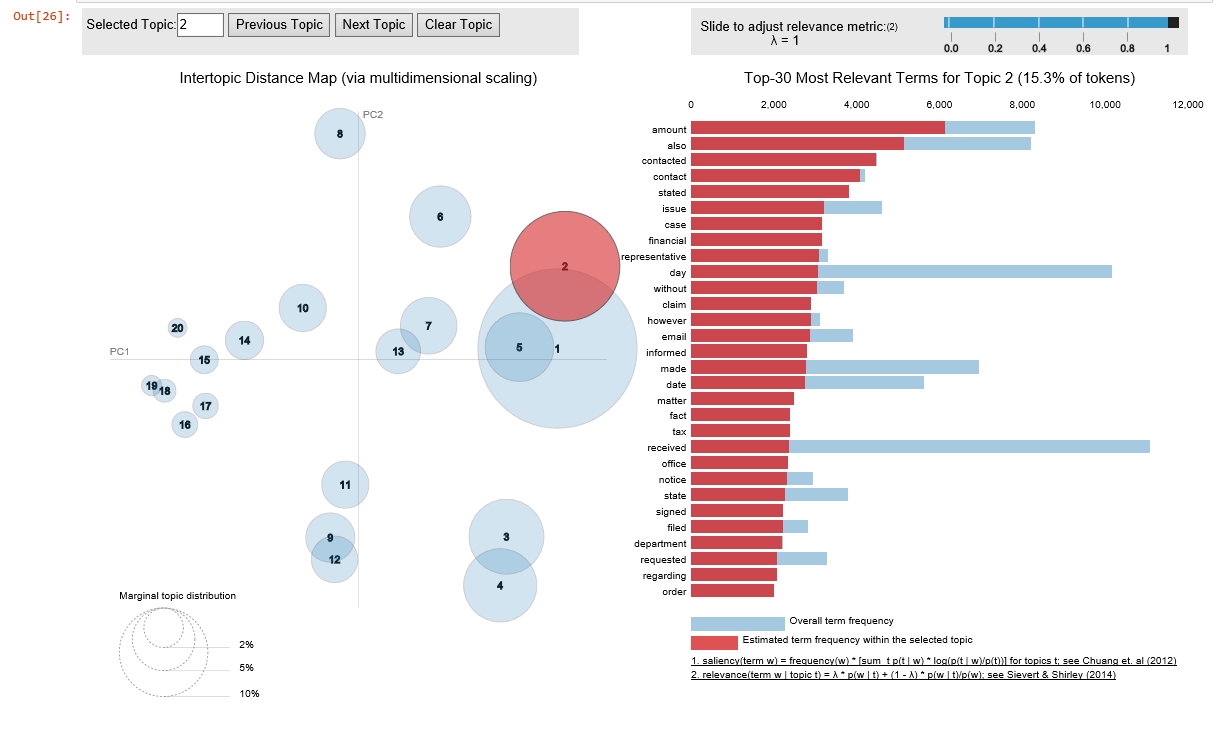

In [28]:
from IPython.display import Image
Image('C:/Users/Harshal/Desktop/pyldavis_consumer.png', height = 800, width = 1200)

#### COMPUTING THE COHERENCE SCORE

In [89]:
from gensim.models import CoherenceModel
import gensim
import os

In [81]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model = lda, texts = word_tokens, dictionary = id2word, coherence = 'c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.41444110072337964


#### CREATING THE WORD EMBEDDING

In [110]:
from gensim.models import word2vec
from sklearn.manifold import TSNE

In [119]:
#apply the word2vec model using gensim
#the word2vec takes the following arguements
#1. cropus = The vocabulary to train the model on
#2. size = The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).
#3. window = The maximum distance between a target word and words around the target word.
#4. min_count = The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.
#5. workers: The number of threads to use while training.
#6. sg: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).
model = word2vec.Word2Vec(word_tokens, size = 100, window = 20, min_count = 1000, workers = 2, sg = 0)

#### TSNE PLOT

***For better visualizing the TSNE plot, the minimum count of the word while building our word2vec model is taken to be 1000. That means all the words having count less than 1000 will be discarded and our final word2vec model will consist of only those words and their corresponding word vectors which have a count of more than 1000.***

In [123]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity = 40, n_components = 2, init = 'pca', n_iter = 2500, random_state = 23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize = (16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy = (x[i], y[i]),
                     xytext = (5, 2),
                     textcoords = 'offset points',
                     ha = 'right',
                     va = 'bottom')
        plt.title('Scatter plot using TSNE')
    plt.show()

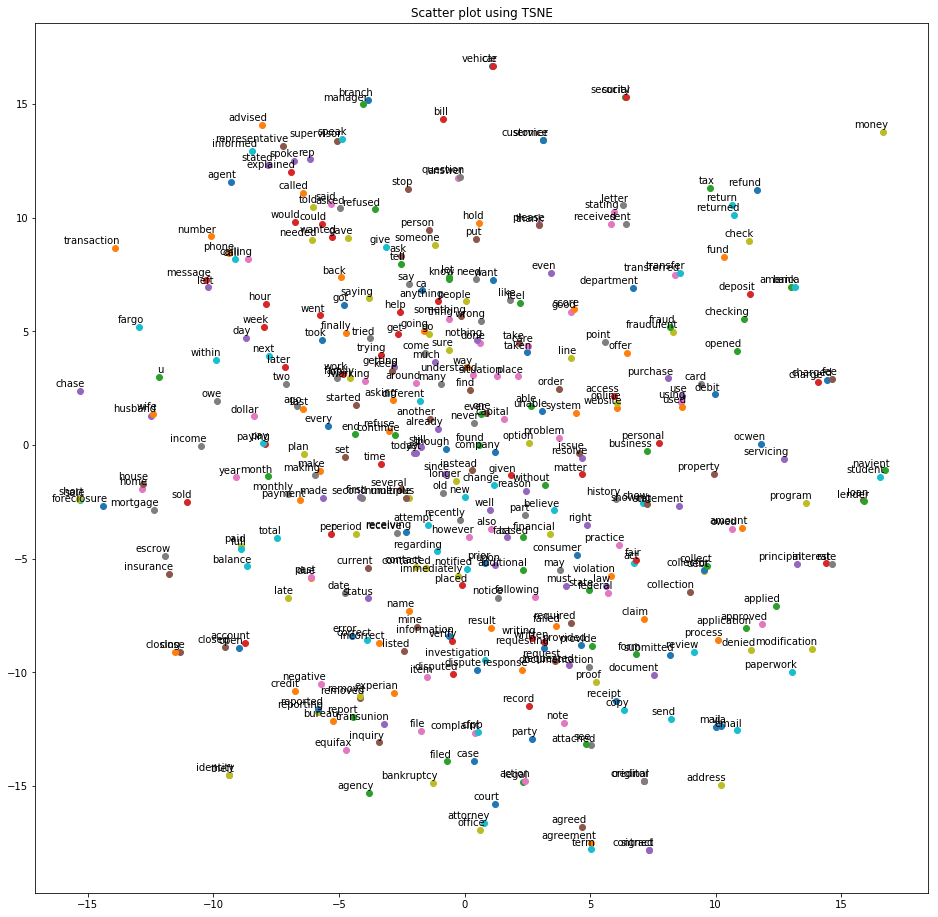

In [124]:
tsne_plot(model)